# Agregación de datos por categoría

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as skl

In [125]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [126]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [127]:
gender_data[1:10]

['Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male']

In [128]:
# N(m,s) -> m + s * Z
np.random.seed(25)
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.rand(n)
age = 30 + 12 * np.random.rand(n)
income =  18000 + 3500 * np.random.rand(n)

In [129]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic Status': income_data,
    'Height': height,
    'Weight': weight,
    'Age': age,
    'Income': income
})

In [130]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,166.848193,74.351735,41.299011,21190.110903
1,Female,Rich,190.806709,67.370601,30.341634,21477.137591
2,Male,Rich,134.812455,86.108630,33.275960,21001.213680
3,Female,Middle Class,142.264554,75.907054,34.777069,18963.794244
4,Male,Middle Class,131.293351,77.635280,30.827126,18515.646904


In [131]:
data["Age"] = np.round(data["Age"],0).astype(np.int)

In [132]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,166.848193,74.351735,41,21190.110903
1,Female,Rich,190.806709,67.370601,30,21477.137591
2,Male,Rich,134.812455,86.108630,33,21001.213680
3,Female,Middle Class,142.264554,75.907054,35,18963.794244
4,Male,Middle Class,131.293351,77.635280,31,18515.646904


## Agrupación de datos

In [133]:
grouped_gender = data.groupby("Gender")

In [134]:
grouped_gender.groups

{'Female': [1, 3, 6, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 25, 28, 29, 33, 34, 39, 40, 41, 43, 44, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 62, 64, 65, 69, 70, 71, 72, 74, 75, 76, 77, 82, 84, 85, 86, 89, 92, 93, 95, 96, 98, 100, 101, 103, 104, 106, 107, 108, 110, 111, 112, 113, 114, 115, 118, 119, 120, 127, 128, 131, 134, 136, 138, 140, 141, 144, 149, 154, 155, 157, 158, 159, 162, 165, 167, 168, 169, 170, 171, 174, 175, 178, 181, 182, 190, ...], 'Male': [0, 2, 4, 5, 7, 9, 12, 18, 23, 24, 26, 27, 30, 31, 32, 35, 36, 37, 38, 42, 45, 46, 50, 58, 59, 60, 61, 63, 66, 67, 68, 73, 78, 79, 80, 81, 83, 87, 88, 90, 91, 94, 97, 99, 102, 105, 109, 116, 117, 121, 122, 123, 124, 125, 126, 129, 130, 132, 133, 135, 137, 139, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 156, 160, 161, 163, 164, 166, 172, 173, 176, 177, 179, 180, 183, 184, 185, 186, 187, 188, 189, 193, 194, 196, 197, 198, 199, 201, 202, 203, ...]}

In [135]:
for name, group in grouped_gender:
    print(names)
    print(group)

Male
     Gender Economic Status      Height     Weight  Age        Income
1    Female            Rich  190.806709  67.370601   30  21477.137591
3    Female    Middle Class  142.264554  75.907054   35  18963.794244
6    Female            Poor  141.402547  80.152774   36  20363.551713
8    Female            Poor   98.403077  84.217750   42  20544.112729
10   Female            Poor  132.377967  76.065887   32  18175.383000
..      ...             ...         ...        ...  ...           ...
483  Female    Middle Class  149.327525  76.302426   31  18896.793904
490  Female            Rich  172.916293  83.101748   34  19519.456095
492  Female            Poor  138.818241  78.187134   30  20529.861443
494  Female            Poor  197.107377  82.162281   31  18780.273252
495  Female            Poor  152.385799  74.131682   36  19415.095178

[240 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight  Age        Income
0     Male    Middle Class  166.848193  74.351735   41  2

In [136]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Rich,190.806709,67.370601,30,21477.137591
3,Female,Middle Class,142.264554,75.907054,35,18963.794244
6,Female,Poor,141.402547,80.152774,36,20363.551713
8,Female,Poor,98.403077,84.217750,42,20544.112729
10,Female,Poor,132.377967,76.065887,32,18175.383000
...,...,...,...,...,...,...
483,Female,Middle Class,149.327525,76.302426,31,18896.793904
490,Female,Rich,172.916293,83.101748,34,19519.456095
492,Female,Poor,138.818241,78.187134,30,20529.861443
494,Female,Poor,197.107377,82.162281,31,18780.273252


In [137]:
double_group = data.groupby(["Gender", "Economic Status"])

In [138]:
len(double_group)

6

In [139]:
for name, group in double_group:
    print(name)
    print(group)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
3    Female    Middle Class  142.264554  75.907054   35  18963.794244
14   Female    Middle Class  162.291390  71.374357   33  19772.800476
15   Female    Middle Class  122.617322  86.829433   30  21280.470383
20   Female    Middle Class  228.845270  77.595972   39  19940.021729
29   Female    Middle Class  219.478782  83.212405   35  20628.982730
..      ...             ...         ...        ...  ...           ...
457  Female    Middle Class  200.580003  74.223008   37  18663.155632
471  Female    Middle Class  245.095367  80.929203   33  19861.564569
476  Female    Middle Class  172.239986  80.706206   40  19991.173054
478  Female    Middle Class  161.348152  76.519455   36  19353.811170
483  Female    Middle Class  149.327525  76.302426   31  18896.793904

[85 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height     Weight  Age        Income
6    Female          

## Operaciones sobre datos agrupados

In [140]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     13982.223174  6636.939240  3052  1.685323e+06
       Poor             12890.493778  6457.397738  2981  1.657219e+06
       Rich             11010.383279  5636.134090  2563  1.416521e+06
Male   Middle Class     14591.135303  7032.243310  3289  1.794799e+06
       Poor             14232.943114  7003.229831  3200  1.751382e+06
       Rich             13241.620722  6290.496973  2867  1.572595e+06

In [141]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     164.496743  78.081638  35.905882  19827.327289
       Poor             155.307154  77.799973  35.915663  19966.490869
       Rich             152.921990  78.279640  35.597222  19673.899334
Male   Middle Class     160.342146  77.277399  36.142857  19723.062503
       Poor             159.920709  78.687976  35.955056  19678.452792
       Rich             165.520259  78.631212  35.837500  19657.443462

In [142]:
double_group.size()

Gender  Economic Status
Female  Middle Class       85
        Poor               83
        Rich               72
Male    Middle Class       91
        Poor               89
        Rich               80
dtype: int64

In [143]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      85.0  164.496743  31.929562  87.384465  143.033868   
       Poor              83.0  155.307154  34.816226  68.503297  130.498713   
       Rich              72.0  152.921990  32.470860  82.165379  132.045463   
Male   Middle Class      91.0  160.342146  27.398905  97.102234  143.974681   
       Poor              89.0  159.920709  29.958909  94.069175  140.265217   
       Rich              80.0  165.520259  32.187321  74.567474  147.132123   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     165.785335  182.473897  245.095367   85.0  78.081638   
       Poor             155.577541  176.975028  221.854246   83.0  77.799973   
       Rich             153.732112  174.645200  244.682692   72.0  78.279640   
Male   Middle Class     161.479130  175.122963  235.408538   91.0  77.277399   
       Poor             158.111390  179.017946  224.588707   89.0  78.687976   
       Rich             164.718770  186.016087  273.224207   80.0  78.631212   

                        ...   Age       Income                             \
                        ...   75%   max  count          mean          std   
Gender Economic Status  ...                                                 
Female Middle Class     ...  39.0  42.0   85.0  19827.327289   969.987657   
       Poor             ...  38.5  42.0   83.0  19966.490869  1043.645620   
       Rich             ...  38.0  42.0   72.0  19673.899334   977.509211   
Male   Middle Class     ...  39.0  42.0   91.0  19723.062503  1039.493958   
       Poor             ...  39.0  42.0   89.0  19678.452792  1032.909627   
       Rich             ...  38.0  42.0   80.0  19657.443462  1011.734472   

                                                                  \
                                 min           25%           50%   
Gender Economic Status                                             
Female Middle Class     18014.347595  19047.831636  19833.667694   
       Poor             18169.103495  18989.037937  20024.930667   
       Rich             18003.916323  18978.014177  19624.010337   
Male   Middle Class     18027.022280  18733.818256  19655.822243   
       Poor             18002.273073  18779.763504  19448.535111   
       Rich             18001.553970  18762.934678  19540.574015   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20559.864004  21469.370781  
       Poor             20893.887402  21482.291667  
       Rich             20471.943402  21477.137591  
Male   Middle Class     20646.053158  21414.725776  
       Poor             20696.526643  21499.256933  
       Rich             20492.769609  21489.727351  

[6 rows x 32 columns]

In [145]:
grouped_income = double_group["Income"]

In [146]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      85.0  19827.327289   969.987657  18014.347595   
       Poor              83.0  19966.490869  1043.645620  18169.103495   
       Rich              72.0  19673.899334   977.509211  18003.916323   
Male   Middle Class      91.0  19723.062503  1039.493958  18027.022280   
       Poor              89.0  19678.452792  1032.909627  18002.273073   
       Rich              80.0  19657.443462  1011.734472  18001.553970   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19047.831636  19833.667694  20559.864004  21469.370781  
       Poor             18989.037937  20024.930667  20893.887402  21482.291667  
       Rich             18978.014177  19624.010337  20471.943402  21477.137591  
Male   Middle Class     18733.818256  19655.822243  20646.053158  21414.725776  
       Poor             18779.763504  19448.535111  20696.526643  21499.256933  
       Rich             18762.934678  19540.574015  20492.769609  21489.727351

In [147]:
double_group.aggregate({
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.685323e+06  35.905882  31.929562
       Poor             1.657219e+06  35.915663  34.816226
       Rich             1.416521e+06  35.597222  32.470860
Male   Middle Class     1.794799e+06  36.142857  27.398905
       Poor             1.751382e+06  35.955056  29.958909
       Rich             1.572595e+06  35.837500  32.187321

In [148]:
double_group.aggregate({
    "Age": np.mean,
    "Height": lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     35.905882  5.182439
       Poor             35.915663  4.487887
       Rich             35.597222  4.742564
Male   Middle Class     36.142857  5.884559
       Poor             35.955056  5.368246
       Rich             35.837500  5.174850

In [149]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13982.223174  164.496743  31.929562  6636.939240   
       Poor             12890.493778  155.307154  34.816226  6457.397738   
       Rich             11010.383279  152.921990  32.470860  5636.134090   
Male   Middle Class     14591.135303  160.342146  27.398905  7032.243310   
       Poor             14232.943114  159.920709  29.958909  7003.229831   
       Rich             13241.620722  165.520259  32.187321  6290.496973   

                                              Age                       \
                             mean       std   sum       mean       std   
Gender Economic Status                                                   
Female Middle Class     78.081638  6.911492  3052  35.905882  3.702070   
       Poor             77.799973  7.431764  2981  35.915663  3.422326   
       Rich             78.279640  7.131594  2563  35.597222  3.338464   
Male   Middle Class     77.277399  7.378950  3289  36.142857  3.704566   
       Poor             78.687976  7.417947  3200  35.955056  3.450659   
       Rich             78.631212  7.582347  2867  35.837500  3.476663   

                              Income                             
                                 sum          mean          std  
Gender Economic Status                                           
Female Middle Class     1.685323e+06  19827.327289   969.987657  
       Poor             1.657219e+06  19966.490869  1043.645620  
       Rich             1.416521e+06  19673.899334   977.509211  
Male   Middle Class     1.794799e+06  19723.062503  1039.493958  
       Poor             1.751382e+06  19678.452792  1032.909627  
       Rich             1.572595e+06  19657.443462  1011.734472

In [150]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height     Weight        Age     Income
                        <lambda>   <lambda>   <lambda>   <lambda>
Gender Economic Status                                           
Female Middle Class     5.182439  11.364411   9.756427  20.562115
       Poor             4.487887  10.532214  10.558316  19.247787
       Rich             4.742564  11.053486  10.737581  20.267802
Male   Middle Class     5.884559  10.530703   9.810352  19.078834
       Poor             5.368246  10.667884  10.478801  19.159417
       Rich             5.174850  10.435729  10.373053  19.552034

## Filtrado de datos

In [152]:
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      41
1      30
2      33
3      35
4      31
       ..
495    36
496    38
497    34
498    38
499    36
Name: Age, Length: 500, dtype: int32

## Transformación de variables

In [159]:
zscore = lambda x: (x - x.mean()) / x.std()

In [160]:
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,0.237456,-0.396488,1.311123,1.411310
1,1.166730,-1.529677,-1.676586,1.844728
2,-0.954034,0.986162,-0.816156,1.328185
3,-0.696289,-0.314633,-0.244696,-0.890252
4,-1.060217,0.048500,-1.388248,-1.161542
...,...,...,...,...
495,-0.083908,-0.493596,0.024643,-0.528336
496,-1.032908,-0.253435,0.622005,1.438983
497,-0.666731,1.545333,-0.578437,-1.279297
498,0.417499,0.919892,0.592624,-0.412891


(array([67., 42., 39., 52., 66., 43., 71., 47., 44., 29.]),
 array([-1.7285505 , -1.36390733, -0.99926417, -0.63462101, -0.26997785,
         0.09466531,  0.45930848,  0.82395164,  1.1885948 ,  1.55323796,
         1.91788112]),
 <BarContainer object of 10 artists>)

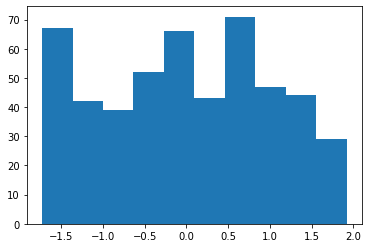

In [161]:
plt.hist(z_group["Age"])

In [162]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [163]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,166.848193,74.351735,41,21190.110903
1,190.806709,67.370601,30,21477.137591
2,134.812455,86.108630,33,21001.213680
3,142.264554,75.907054,35,18963.794244
4,131.293351,77.635280,31,18515.646904
...,...,...,...,...
495,152.385799,74.131682,36,19415.095178
496,132.273723,76.709579,38,21113.312330
497,142.074437,88.680336,34,18393.241457
498,172.428518,85.511685,38,19251.974110


## Operaciones diversas muy útiles

In [164]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,166.848193,74.351735,41,21190.110903
1,Female,Rich,190.806709,67.370601,30,21477.137591
2,Male,Rich,134.812455,86.108630,33,21001.213680
3,Female,Middle Class,142.264554,75.907054,35,18963.794244
5,Male,Poor,153.330229,88.610095,39,20696.526643
6,Female,Poor,141.402547,80.152774,36,20363.551713


In [167]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
483,Female,Middle Class,149.327525,76.302426,31,18896.793904
490,Female,Rich,172.916293,83.101748,34,19519.456095
495,Female,Poor,152.385799,74.131682,36,19415.095178
496,Male,Rich,132.273723,76.709579,38,21113.312330
497,Male,Middle Class,142.074437,88.680336,34,18393.241457
499,Male,Poor,146.494091,77.045451,36,21153.054673


In [168]:
double_group.nth(32)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     134.209842  87.964924   36  19121.164075
       Poor             210.816125  83.632774   34  19624.921302
       Rich              83.394665  77.778552   34  21208.244294
Male   Middle Class     171.374881  82.491401   37  19433.412643
       Poor             186.365525  79.661035   37  18002.273073
       Rich             156.680554  76.838311   31  18667.549995

In [169]:
double_group.nth(82)

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     172.239986  80.706206   40  19991.173054
       Poor             152.385799  74.131682   36  19415.095178
Male   Middle Class     197.608343  65.162563   37  20086.210626
       Poor             161.980047  85.343959   33  20857.890439

In [171]:
data_sorted = data.sort_values(["Age", "Income"])

In [174]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
408,Female,Rich,106.427273,69.881386,30,18357.264154
389,Female,Middle Class,189.494041,82.005479,30,18399.626721
191,Female,Poor,94.919937,70.107349,30,18487.438653
218,Male,Middle Class,137.524216,66.361971,30,18655.764313
380,Female,Rich,158.150449,83.944113,30,18760.675072
269,Female,Middle Class,162.972757,76.684678,30,19014.315677
360,Male,Rich,109.459824,66.843746,30,19148.388672
206,Female,Middle Class,160.135028,82.589559,30,19382.944526
88,Male,Middle Class,191.384343,76.248356,30,19527.260435
322,Male,Middle Class,182.363318,83.917567,30,19926.492463


In [183]:
age_grouped = data_sorted.groupby("Gender")

In [184]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
408,Female,Rich,106.427273,69.881386,30,18357.264154
218,Male,Middle Class,137.524216,66.361971,30,18655.764313


In [185]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
81,Male,Middle Class,134.465927,81.881531,42,20657.631199
219,Female,Middle Class,140.382519,76.038057,42,21469.370781


## Conjunto de entrenamiento y conjunto de testing

In [192]:
import pandas as pd

In [193]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [194]:
len(data)

3333

## Dividir utilizando la distribución normal

In [195]:
a = np.random.randn(len(data))

(array([ 19.,  75., 257., 595., 825., 863., 489., 171.,  32.,   7.]),
 array([-3.39716302, -2.70180603, -2.00644904, -1.31109205, -0.61573506,
         0.07962193,  0.77497892,  1.47033591,  2.1656929 ,  2.86104989,
         3.55640688]),
 <BarContainer object of 10 artists>)

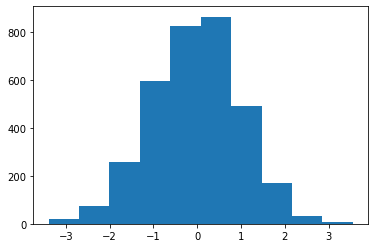

In [197]:
plt.hist(a)

In [205]:
check = (a < 0.75)

In [199]:
check

array([ True, False,  True, ...,  True,  True,  True])

In [206]:
check_int = check.astype(np.int)

(array([ 733.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2600.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

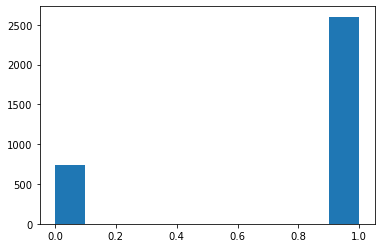

In [207]:
plt.hist(check_int)

In [208]:
training = data[check]
testing = data[~check]

In [209]:
print(len(training))
print(len(testing))

2600
733


## Con la librería sklearn

In [211]:
train, test = train_test_split(data, test_size = 0.2)

In [212]:
len(train)

2666

In [213]:
len(test)

667

## Usando una función de shuffle

In [214]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [221]:
data = skl.utils.shuffle(data)

In [224]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [225]:
len(train_data)

2499

In [226]:
len(test_data)

833